# Predicting the Sale Price of Bulldozers using ML

In this notebook, we're going to predict the sales price of bulldozers.

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its attributes and historical sales of bulldozers at auctions

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition:

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
* Test.csv is the test set, which contains data from May 1, 2012 - November 2012.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more information on the evaluation of this project check:
https://www.kaggle.com/c/bluebook-for-bulldozers/data


## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view it here:
https://docs.google.com/spreadsheets/d/1_fSxZuMwTByx5oD6se1Ji1EUezIdCtfmJi6e7ltDw-0/edit#gid=590674478


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import training and validation data

df = pd.read_csv("data/TrainAndValid.csv",
                low_memory=False)

In [6]:
# dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [7]:
# Missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

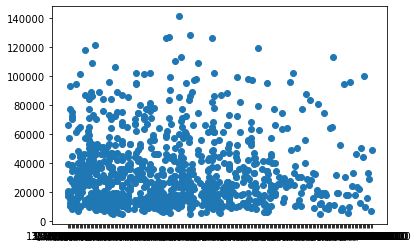

In [9]:
# Time-series
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

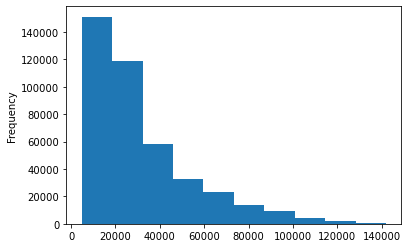

In [11]:
# Distribution
df.SalePrice.plot.hist();

### Parsing dates

Convert date columns with pandas parse_date argument

In [12]:
df = pd.read_csv("data/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

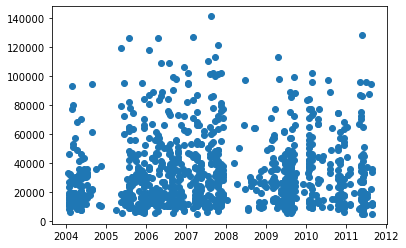

In [14]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [16]:
df.head(5).T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

In [21]:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10)

205615   1989-01-17
67974    1989-01-31
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the DataFrame

In [23]:
df_tmp = df.copy()

### Add datetime parameters for `saledate` column`

In [25]:
df_tmp["sale_year"] = df_tmp.saledate.dt.year
df_tmp["sale_month"] = df_tmp.saledate.dt.month
df_tmp["sale_day"] = df_tmp.saledate.dt.day
df_tmp["sale_dayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["sale_dayOfYear"] = df_tmp.saledate.dt.dayofyear

In [28]:
# Drop saledate since we have date time columns

df_tmp.drop("saledate", axis=1, inplace=True)

## Modelling

Model-driven EDA

In [34]:
# Try building ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

# Haven't converted to binaries

ValueError: could not convert string to float: 'Low'

In [39]:
# Find columns which contain strings

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [41]:
df_tmp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [ ]:
# Export preprocessed csv

df_tmp.to_csv("data/train_tmp.csv", index=False)

# Import preprocessed csv

df_tmp = pd.read_csv("data/train_tmp.csv")

Converted strings to categories

## Missing values

In [44]:
# percentage of missing values

df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Fill numerical missing values first

In [47]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
sale_year
sale_month
sale_day
sale_dayOfWeek
sale_dayOfYear
Executing shutdown due to inactivity...


2021-12-26 12:51:39,438 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-12-26 12:51:39,455 - INFO     - Executing shutdown...


In [48]:
# Check for which numeric columns have null values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())

In [54]:
# Filling and turning categorical variables into numbers and fill missing

# Check for columns that aren't numeric

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        df_tmp[label] = pd.Categorical(content).codes + 1

In [56]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1344379,1821514,1505138,1671174
SalePrice,9500.0,70000.0,14000.0,50000.0,16000.0
MachineID,1126363,1374638,1194089,1473654,1327630
ModelID,8434,3819,10150,4139,8591
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,True,False,True
Blade_Type_is_missing,False,True,True,False,True
Travel_Controls_is_missing,False,True,True,False,True
Differential_Type_is_missing,True,False,False,True,False


In [58]:
# No more missing values

df_tmp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

In [60]:
%%time

# Instantiate model

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])


CPU times: user 21min 50s, sys: 11.9 s, total: 22min 2s
Wall time: 8min 18s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [61]:
# Score the model

model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875954615410482

**Question:** Why isn't the above metric reliable?

### Splitting data into train/validation sets

In [63]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1344379,70000.0,1374638,3819,132,99.0,1982,0.0,0,1740,...,True,True,True,True,True,True,True,True,False,False
2,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
3,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
4,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False


In [64]:
df_tmp.sale_year

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: sale_year, Length: 412698, dtype: int64

In [65]:
df_tmp.sale_year.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: sale_year, dtype: int64

In [68]:
# Split data into training and validation set

df_val = df_tmp[df_tmp.sale_year == 2012]

df_train = df_tmp[df_tmp.sale_year != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [70]:
# Split data into X & y

X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]

X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [77]:
# Create evaluation function (the competition uses RMSLE)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.metrics import r2_score

def rmsle(y_test, y_preds):
    '''
    Calculate root mean squared log error between predictions 
    and true labels.
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Validation MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    
    
    return scores


## Testing our model on a subset (to tune the hyperparameters)

In [73]:
# This takes far too long ...

# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(X_train, y_train)

In [74]:
# Change max_samples value

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                             max_samples=10000)


In [75]:
%%time

model.fit(X_train, y_train)

CPU times: user 44.8 s, sys: 1.09 s, total: 45.9 s
Wall time: 21.5 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [78]:
show_scores(model)

{'Training MAE': 5547.37619213462,
 'Validation MAE': 7107.692941328955,
 'Training RMSLE': 0.2572097291075863,
 'Valid RMSLE': 0.2920409007251155,
 'Training R^2': 0.8611749601062739,
 'Valid R^2': 0.8346444816753742}

## Hyperparameter tuning with RandomizedSearchCV

In [81]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
            "n_estimators": np.arange(10, 100, 10),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2),
            "max_features": [0.5, 1, "sqrt", "auto"],
            "max_samples": [10000]
}

# Instantiate RandomizedSearchCV model

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 44.6 s, sys: 6.7 s, total: 51.2 s
Wall time: 1min 15s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [82]:
# Find the best model hyperparameters

rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [83]:
# Evaluate the RandomizedSearch model

show_scores(rs_model)

{'Training MAE': 9090.982031415659,
 'Validation MAE': 10471.368158953986,
 'Training RMSLE': 0.3995181831594861,
 'Valid RMSLE': 0.41736294527259643,
 'Training R^2': 0.6729800849942962,
 'Valid R^2': 0.6842411339421777}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`

In [85]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [86]:
show_scores(ideal_model)

{'Training MAE': 2953.338139925295,
 'Validation MAE': 5928.860630753666,
 'Training RMSLE': 0.1446014584808953,
 'Valid RMSLE': 0.24512849116084306,
 'Training R^2': 0.9589011437105691,
 'Valid R^2': 0.8825130634074714}

## Make predictions on test data

In [143]:
df_test = pd.read_csv("data/Test.csv", low_memory=False,
                     parse_dates=["saledate"])

## Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [144]:
def preprocess_data(df):
    '''
    Performs transformation
    '''
    
    df["sale_year"] = df.saledate.dt.year
    df["sale_month"] = df.saledate.dt.month
    df["sale_day"] = df.saledate.dt.day
    df["sale_dayOfWeek"] = df.saledate.dt.dayofweek
    df["sale_dayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Find columns which contain strings

        
    
    # Check for which numeric columns have null values

    for label, content in df.items():
        
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
            
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
    
    df["auctioneerID_is_missing"] = False

    return df
    

In [146]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [145]:
# Make predictions on test data

test_preds = ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

In [115]:
# Format predictions into same prediction Kaggle is after

df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,20780.972074
1,1227844,19287.394775
2,1227847,50799.499702
3,1227848,66266.579781
4,1227863,44520.003461
...,...,...
12452,6643171,43114.142197
12453,6643173,14152.325098
12454,6643184,15114.392741
12455,6643186,17603.780549


In [116]:
df_preds.to_csv("data/test_predictions.csv", index=False)

### Feature Importance

Which attributes were most importing in predicting SalePrice

In [118]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
            .sort_values("feature_importances", ascending=False)
            .reset_index(drop=True))
            
    
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

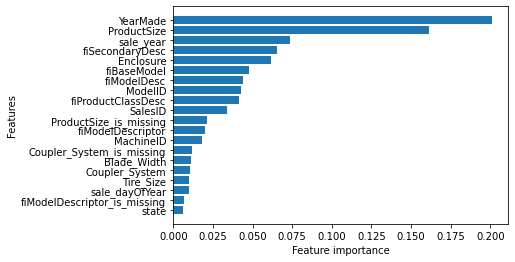

In [121]:
plot_features(X_train.columns, ideal_model.feature_importances_)

## Save model to pickle file

In [128]:
import pickle

pickle.dump(ideal_model, open("./model/ideal_model.pkl", "wb"))

In [130]:
# Load pickle file

pickle.load(open("./model/ideal_model.pkl", "rb"))

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [132]:
# Check if model is working

show_scores(ideal_model)

{'Training MAE': 2953.338139925295,
 'Validation MAE': 5928.860630753666,
 'Training RMSLE': 0.1446014584808953,
 'Valid RMSLE': 0.24512849116084306,
 'Training R^2': 0.9589011437105691,
 'Valid R^2': 0.8825130634074714}

## Create model with 5 n_estimators to deploy

In [135]:
small_model = RandomForestRegressor(n_estimators=5,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42)

small_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=5,
                      n_jobs=-1, random_state=42)

In [137]:
# Dump small model

pickle.dump(small_model, open("./model/small_model.pkl", "wb"))